In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/google-fpt-telecom-reviews-data','/kaggle/input/vietnamese-stopwords/stopwords.txt'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-fpt-telecom-reviews-data/reviews.csv


In [14]:
!pip install -q py_vncorenlp stop_words underthesea

In [ ]:
# Cài đặt Java
!apt-get install openjdk-11-jdk -y

# Thiết lập JAVA_HOME
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
stop_words_vi = get_stop_words('vi')
import py_vncorenlp
from tqdm import tqdm
import networkx as nx
from collections import Counter

import pandas as pd
from nltk import ngrams
from gensim.models import Word2Vec
from wordcloud import WordCloud

import sys
import importlib
import collections
import itertools
import matplotlib.pyplot as plt
import logging

In [22]:
save_dir = '/kaggle/working/vncorenlp'

In [ ]:
data = pd.read_csv('/kaggle/input/google-fpt-telecom-reviews-data/reviews.csv')
if 'Review Text' in data.columns:
    # Thay thế các giá trị NaN trong cột 'Review Text' bằng chuỗi rỗng
    data['Review Text'] = data['Review Text'].fillna("")

    # Áp dụng hàm preprocess_text vào cột 'Review Text'
    data['Processed Review Text'] = data['Review Text'].apply(preprocess_text)
data.head(5)

In [25]:
import py_vncorenlp
from tqdm import tqdm

save_dir = '/kaggle/working/vncorenlp'
# Kiểm tra và tạo thư mục lưu trữ nếu chưa tồn tại
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
# Tự động tải các thành phần của VnCoreNLP vào thư mục save_dir
py_vncorenlp.download_model(save_dir=save_dir)

VnCoreNLP model folder /kaggle/working/vncorenlp already exists! Please load VnCoreNLP from this folder!


In [27]:
# Tách cột Review Text
review_text = data['Review Text']

# Định nghĩa đường dẫn file đầu ra
output_file_path = '/kaggle/working/review_text.txt'

# Lưu cột Review Text vào file .txt
with open(output_file_path, 'w', encoding='utf-8') as file:
    for review in review_text:
        file.write(review + '\n')

In [30]:
# Khởi tạo bộ tách từ
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=save_dir)

# Định nghĩa đường dẫn file đầu vào và đầu ra
input_file_path = '/kaggle/working/review_text.txt'  # Thay đổi đường dẫn này cho phù hợp
output_file_path = '/kaggle/working/output_segmented.txt'

# Đọc nội dung từ file đầu vào
with open(input_file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Thực hiện tách từ và tạo thanh tiến trình
segmented_text = []
with tqdm(total=len(text.split('\n')), desc="Segmenting") as pbar:
    for line in text.split('\n'):
        segmented_line = rdrsegmenter.word_segment(line)
        segmented_text.append(segmented_line)
        pbar.update(1)

# Ghi kết quả vào tệp đầu ra
with open(output_file_path, 'w', encoding='utf-8') as file:
    for line in segmented_text:
        for sentence in line:
            file.write(sentence + '\n')


2024-10-01 08:17:44 INFO  WordSegmenter:24 - Loading Word Segmentation model


Segmenting: 100%|██████████| 172/172 [00:00<00:00, 267.87it/s]


In [6]:
# import re
# import string
# from underthesea import word_tokenize  
# import pandas as pd

# vietnamese_stopwords_file = '/kaggle/input/vietnamese-stopwords/stopwords.txt' 

# # Đọc các từ dừng tiếng Việt từ file
# with open(vietnamese_stopwords_file, 'r', encoding='utf-8') as f:
#     vietnamese_stopwords = f.read().splitlines()

# def preprocess_text(text):

#     # Chuyển văn bản thành chữ thường
#     text = text.lower()

#     # Loại bỏ URL
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     text = url_pattern.sub(r" ", text)

#     # Loại bỏ thẻ HTML
#     html_pattern = re.compile(r'<[^<>]+>')
#     text = html_pattern.sub(" ", text)

#     # Loại bỏ dấu câu và số
#     replace_chars = list(string.punctuation + string.digits)
#     for char in replace_chars:
#         text = text.replace(char, " ")

#     text = " ".join(text.split())

#     # Loại bỏ emoji
#     emoji_pattern = re.compile("[" 
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U0001F1F2-\U0001F1F4"  # Macau flag
#         u"\U0001F1E6-\U0001F1FF"  # flags
#         u"\U0001F600-\U0001F64F"
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         u"\U0001f926-\U0001f937"
#         u"\U0001F1F2"
#         u"\U0001F1F4"
#         u"\U0001F620"
#         u"\u200d"
#         u"\u2640-\u2642"
#         "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r" ", text)

#     text = " ".join(text.split())

#     # Tokenize text sử dụng underthesea
#     tokens = word_tokenize(text)

#     # Loại bỏ các từ dừng tiếng Việt
#     filtered_tokens = [word for word in tokens if word.lower() not in vietnamese_stopwords]

#     return " ".join(filtered_tokens)


In [31]:
def count_unique_words(file_path):
    unique_words = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            words = line.strip().split()
            unique_words.update(words)
    return len(unique_words)

file_path = output_file_path  # Provide the path to your text file
num_unique_words = count_unique_words(file_path)
print("Number of unique words in the file:", num_unique_words)

Number of unique words in the file: 402


In [32]:
import pandas as pd

with open(file_path, "r", encoding="utf-8") as file:
    content = file.readlines()

df = pd.DataFrame({"row": content})
df = df[df["row"].str.strip() != ""]
df.reset_index(drop=True, inplace=True)
print(df)

                                                   row
0    Internet chập_chờn , chụp ảnh và báo cho nhân_...
1    Gọi điện_thoại thì không nghe ( gọi cả dt thườ...
2          Tôi đề_nghị phải khắc_phục ngay cho tôi .\n
3     Tôi rất đồng_tình với những ý_kiến cho 1 sao .\n
4                 Phản_ánh dịch_vụ bảo_hành camera .\n
..                                                 ...
102                                         Được rồi\n
103                                         Được rồi\n
104                                         Được rồi\n
105                                         Được rồi\n
106                                         ĐƯỢC RỒI\n

[107 rows x 1 columns]


In [33]:
def transform_row(row):
  '''
  basic text preprocessing:
  - remove punctuation
  - remove vietnamese stopwords
  '''
  if isinstance(row, str):
      row = re.sub(r'[^\w\s]', '', row)
      words = row.split()
      filtered_words = [word for word in words if word.lower() not in stop_words_vi]
      row = " ".join(filtered_words).strip()
  return row

df["row"] = df.row.apply(transform_row)
df.head(10)

,row
0,Internet chập_chờn chụp ảnh báo nhân_viên kỹ_t...
1,Gọi điện_thoại gọi dt zalo
2,đề_nghị khắc_phục
3,đồng_tình ý_kiến 1
4,Phản_ánh dịch_vụ bảo_hành camera
5,Tư_vấn hướng giải_quyết
6,Báo hành chờ phản_hồi chờ 3 phản_hồi gọi khách...
7,Làm_việc tắc_trách
8,Camera fpt mua bảo_hành 2 1 hỏng bảo_hành
9,Báo bảo_hành sản_phẩm fpt sản_phẩm kém chất_lượng


In [36]:
import pandas as pd
from nltk import ngrams

# Giả sử bạn đã có DataFrame df với cột 'row'
# df = pd.DataFrame({"row": ["text example one", "text example two", "another example"]})

# Định nghĩa hàm ngram
def ngram(string, n=1):
    words = string.split()
    if len(words) < n:  # Kiểm tra nếu số từ ít hơn n
        return []  # Trả về danh sách rỗng
    gram_str = list(ngrams(words, n))
    return [" ".join(gram).lower() for gram in gram_str]

# Sử dụng timeit để đo thời gian thực thi
%timeit -n 10 df["unigram"] = df.row.apply(lambda t: ngram(t, 1))
%timeit -n 10 df["bigram"] = df.row.apply(lambda t: ngram(t, 2))


1.03 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
926 µs ± 63.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
import pandas as pd
from nltk import bigrams

# Giả sử bạn đã có DataFrame df với cột 'unigram'
# df = pd.DataFrame({"unigram": [["example", "text"], ["another", "example"]]})

# Tạo bigram từ các unigram
terms_bigram = [list(bigrams(tweet)) for tweet in df["unigram"] if len(tweet) > 1]  # Chỉ lấy những tweet có nhiều hơn 1 từ

# Kiểm tra kết quả của bigram đầu tiên
if terms_bigram:
    print(terms_bigram[0])  # In bigram đầu tiên nếu có
else:
    print("Không có bigram nào được tạo.")


[('internet', 'chập_chờn'), ('chập_chờn', 'chụp'), ('chụp', 'ảnh'), ('ảnh', 'báo'), ('báo', 'nhân_viên'), ('nhân_viên', 'kỹ_thuật'), ('kỹ_thuật', 'nguyễn_minh_quang'), ('nguyễn_minh_quang', 'ta'), ('ta', 'bảo'), ('bảo', 'kiểm_tra'), ('kiểm_tra', 'báo'), ('báo', '2'), ('2', 'báo')]


In [39]:
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(25)

[(('fpt', 'telecom'), 4),
 (('tự_ý', 'thay_đổi'), 2),
 (('nhân_viên', 'vui_vẻ'), 2),
 (('sử_dụng', 'dịch_vụ'), 2),
 (('phòng', 'giao_dịch'), 2),
 (('internet', 'truyền_hình'), 2),
 (('có_thể', 'đăng_ký'), 2),
 (('chất_lượng', 'dịch_vụ'), 2),
 (('truyền_hình', 'fpt'), 2),
 (('nhân_viên', 'thân_thiện'), 2),
 (('dịch_vụ', 'fpt'), 2),
 (('dịch_vụ', 'internet'), 2),
 (('internet', 'chập_chờn'), 1),
 (('chập_chờn', 'chụp'), 1),
 (('chụp', 'ảnh'), 1),
 (('ảnh', 'báo'), 1),
 (('báo', 'nhân_viên'), 1),
 (('nhân_viên', 'kỹ_thuật'), 1),
 (('kỹ_thuật', 'nguyễn_minh_quang'), 1),
 (('nguyễn_minh_quang', 'ta'), 1),
 (('ta', 'bảo'), 1),
 (('bảo', 'kiểm_tra'), 1),
 (('kiểm_tra', 'báo'), 1),
 (('báo', '2'), 1),
 (('2', 'báo'), 1)]

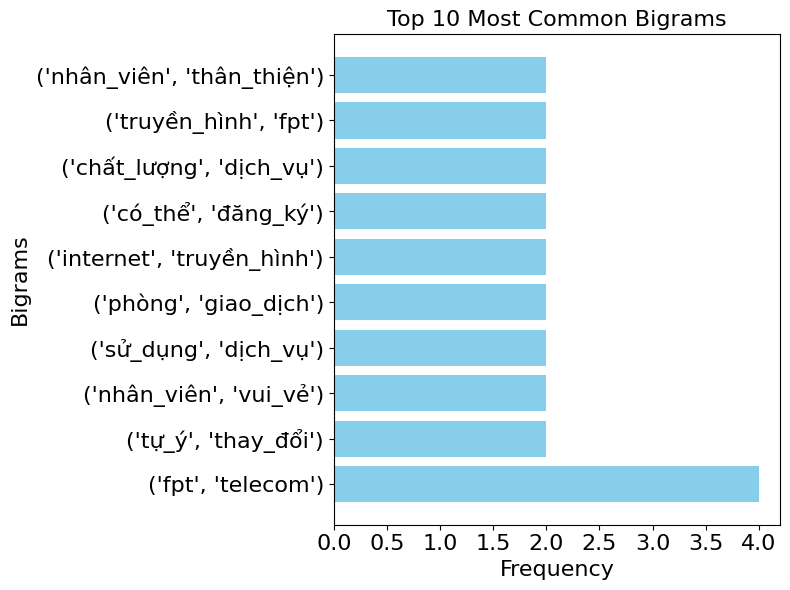

In [40]:
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)
top_25_bigrams = bigram_counts.most_common(25)
bigram_labels, counts = zip(*top_25_bigrams[:10])

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.barh(range(len(bigram_labels)), counts, color='skyblue')
plt.yticks(range(len(bigram_labels)), bigram_labels,fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Frequency',fontsize=16)
plt.ylabel('Bigrams',fontsize=16)
plt.title('Top 10 Most Common Bigrams',fontsize=16)
plt.tight_layout()
plt.savefig('bigram_hist.pdf')
plt.show()

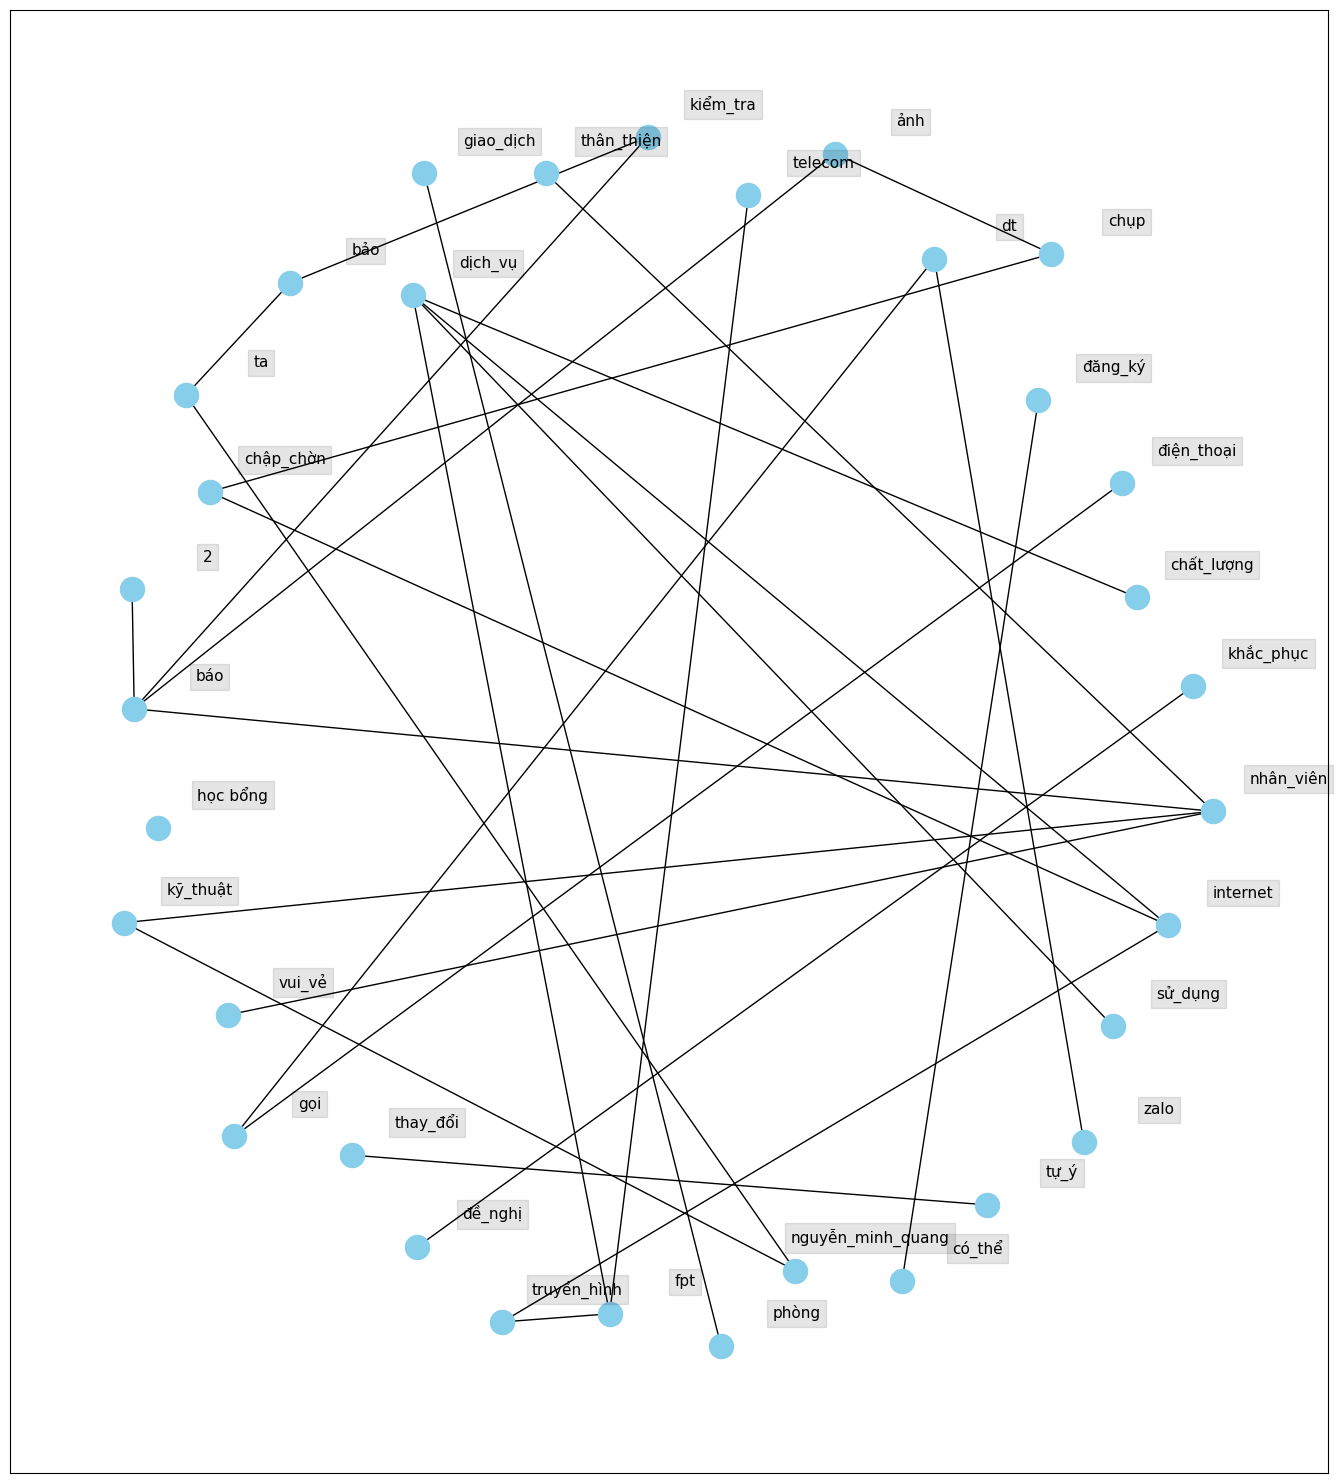

In [41]:

bigram_df = pd.DataFrame(bigram_counts.most_common(30),columns=['unigram', 'count'])

d = bigram_df.set_index('unigram').T.to_dict('records')
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("học bổng", weight=100) # Thêm node sad tỏng G

fig, ax = plt.subplots(figsize=(17, 19))
pos = nx.spring_layout(G, k=10)

nx.draw_networkx(G, pos,
                 edge_color='black',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='black', alpha=0.10),
            horizontalalignment='center', fontsize=11)
plt.savefig('wordnet.pdf')
plt.show()

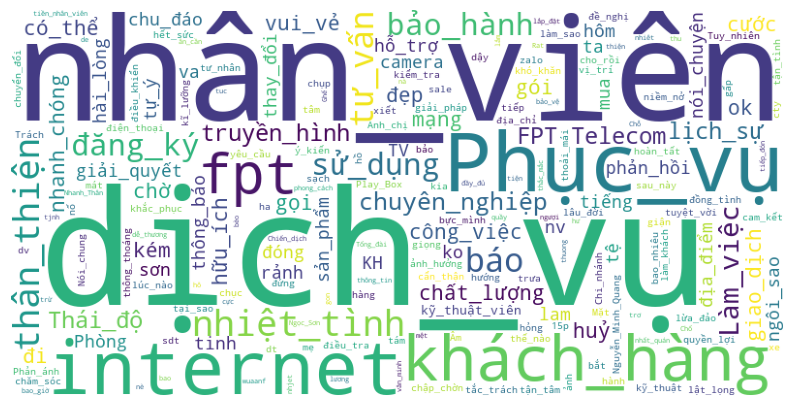

In [42]:

text = " ".join(df['row'])
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      colormap='viridis',
                      stopwords=None).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.pdf')
plt.show()

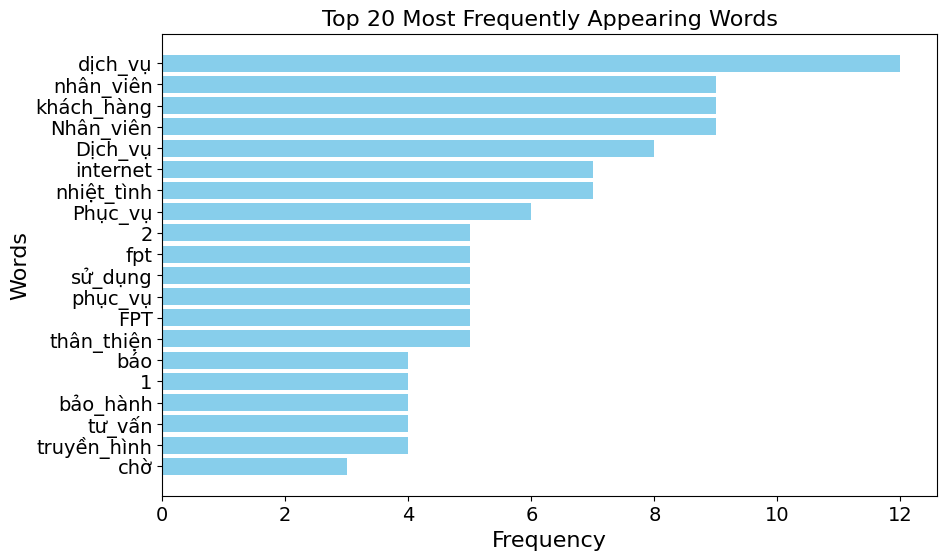

In [43]:
text = " ".join(df['row'])
words = text.split()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)
top_words, word_freqs = zip(*top_20_words)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.barh(top_words, word_freqs, color='skyblue')
plt.xlabel('Frequency',fontsize=16)
plt.ylabel('Words',fontsize=16)
plt.title('Top 20 Most Frequently Appearing Words',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.savefig('word-freq.pdf')
plt.show()